In [1]:
from keras import models
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
def import_data():
    # Загружаем обьединенный датасет.
    df_bp = []
    df_bp = pd.read_csv('C:/Users/User/VKR/X_bp.csv')
    df_nup = []
    df_nup = pd.read_csv('C:/Users/User/VKR/X_nup.csv')
    df = df_bp.merge(df_nup, left_on='Unnamed: 0', right_on='Unnamed: 0')
    return df

In [3]:
data = import_data()
data

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [4]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)


In [5]:
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [6]:
for x in data:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
data.head()
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,NaN,22.267857,NaN,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,NaN,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [7]:
data = data.dropna(axis = 0)
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [8]:
def get_dfpm(dfp):
    # transformer = MinMaxScaler().fit(dfp)
    scaler = MinMaxScaler()
    col = dfp.columns
    processed = scaler.fit_transform(dfp)
    dfpm = pd.DataFrame(processed, columns=col)
    return dfpm

In [9]:
dfpm = get_dfpm(data)
dfpm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
932,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
933,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
934,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


In [10]:
def build_model(xtrn):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(xtrn.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
    return model

In [11]:
result = ['Соотношение матрица-наполнитель']
inputcol = ['Плотность, кг/м3', 'модуль упругости, ГПа',
                'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
                'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
                'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                'Потребление смолы, г/м2', 'Угол нашивки, град',
                'Шаг нашивки', 'Плотность нашивки']

In [12]:
x_train = dfpm[inputcol]
y_train = dfpm[result]
xtrn, xtest, ytrn, ytest = train_test_split(x_train, y_train, test_size=0.3)
model = build_model(xtrn)

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
k = 4
num_val_samples = len(xtrn) // k
num_epochs =300
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the training data: data from all other partitions
    val_data = xtrn[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = ytrn[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [xtrn[:i * num_val_samples],
         xtrn[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [ytrn[:i * num_val_samples],
         ytrn[(i + 1) * num_val_samples:]],
        axis=0)    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
model.fit(partial_train_data, partial_train_targets, 
              epochs=num_epochs, batch_size=4, validation_data=(val_data, val_targets), verbose=0)

In [16]:
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [17]:
all_scores

[0.20637905597686768]

In [18]:
# Вводим функцию для вычисления точности модели. На входе модель, а также входные параметры и целевая переменная
def evaluate(model, test_features, test_labels):
# Делаем предсказание на основе входных параметров
    predictions = model.predict(test_features)
# Считаем абсолютные ошибки в предсказаниях (разность между предсказанным значением и целевым значением)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
# Определяем точность модели
    accuracy = 100 - mape
    print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors.values)))
    return accuracy

In [19]:
# Оцениваем точность на тестовом наборе
base_accuracy = evaluate(model, xtest, ytest)

Средняя абсолютная ошибка: 0.1875


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [20]:
# Оцениваем точность на тренировочном наборе
base_accuracy = evaluate(model, xtrn, ytrn)

Средняя абсолютная ошибка: 0.0836


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [21]:
transformer = MinMaxScaler().fit(data)

In [22]:
def prepare_for_input(data):
    df_user = data.copy(deep=True)
    df_user = df_user.reset_index()
    df_user = df_user.drop(labels=range(1, len(data)), axis=0)
    df_user.drop(['index'], inplace=True, axis=1)
    return df_user

In [23]:
user_input = prepare_for_input(data)
user_input

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0


In [24]:
print('Введите параметры:')
a = 0
for i in data.columns:
    if a != 0:
        print(data.columns[a])
        y = input()
        user_input[data.columns[a]].values[0] = float(y)
    else:
        user_input[data.columns[a]].values[0] = 0
    a += 1
    if a == 13:
        break
        
user_input

Введите параметры:
Плотность, кг/м3
1950
модуль упругости, ГПа
506
Количество отвердителя, м.%
129
Содержание эпоксидных групп,%_2
21
Температура вспышки, С_2
300
Поверхностная плотность, г/м2
380
Модуль упругости при растяжении, ГПа
75
Прочность при растяжении, МПа
1800
Потребление смолы, г/м2
120
Угол нашивки, град
0
Шаг нашивки
10
Плотность нашивки
60


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1950.0,506.0,129.0,21.0,300.0,380.0,75.0,1800.0,120.0,0.0,10.0,60.0


In [25]:
modified = transformer.transform(user_input)
modified


array([[-0.1148352 ,  0.43894253,  0.30574959,  0.63098305,  0.40003213,
         0.58359624,  0.29393784,  0.59548595,  0.22384708,  0.19065905,
         0.        ,  0.72745759,  0.55715613]])

In [26]:
user_input_modified = pd.DataFrame(modified, columns = data.columns)
user_input_modified.drop(result, inplace = True, axis = 1)
user_input_modified

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.438943,0.30575,0.630983,0.400032,0.583596,0.293938,0.595486,0.223847,0.190659,0.0,0.727458,0.557156


In [27]:
pred = model.predict(user_input_modified)
pred

array([[0.6094365]], dtype=float32)

In [28]:
pred_inversed = pd.DataFrame([])
pred_inversed

""


In [29]:
pred_inversed.at[0, 0] = float(pred)
for i in range(1, 13):
    p = 0
    pred_inversed.at[0, i] = float(p)


Y_trans = transformer.inverse_transform(pred_inversed)
Y_trans

array([[3.45242413e+00, 1.78448225e+03, 2.43690875e+00, 3.86685003e+01,
        1.56958938e+01, 1.79374391e+02, 6.03739925e-01, 6.55533359e+01,
        1.25039280e+03, 6.36856983e+01, 0.00000000e+00, 3.76389367e-02,
        2.72729280e+01]])

In [30]:
print('Соотношение матрица-наполнитель: ' + str(Y_trans[0, 0]))

Соотношение матрица-наполнитель: 3.452424132821432


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


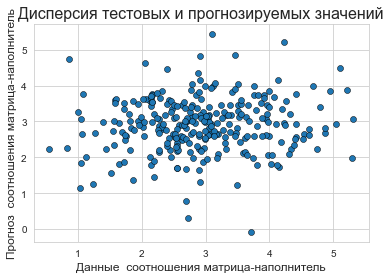

,Данные cоотношения матрица-наполнитель,Прогноз cоотношения матрица-наполнитель
0,2.587348,2.899346
1,3.375778,3.445801
2,2.763159,3.864521
3,3.391009,3.190696
4,2.538562,2.529658
...,...,...
276,1.545708,2.719203
277,1.067339,2.650183
278,1.120752,1.998946
279,3.660787,3.456922


In [33]:
# Спрогнозированные данные
predict = model.predict(xtest)
predict_values = np.ravel(predict)
# Тестовые данные
tv = ytest.copy()
test_values = np.ravel(tv)
# Преобразуем нормализованные данные к исходным
col2 = ["Соотношение матрица-наполнитель"]
# Определим параметры, которые использовались для нормализации
min_ = np.min(data[col2])
max_ = np.max(data[col2])
# Переведем данные из нормализованных в исходные
i = 0
while i < len(predict_values):
    predict_values[i] = predict_values[i]*(max_ - min_) + min_
    test_values[i] = test_values[i]*(max_ - min_) + min_
    i += 1
# Создадим датасет с тестовыми данными и прогнозируемыми значениями
feature_results = pd.DataFrame({'Данные  cоотношения матрица-наполнитель': test_values,'Прогноз  cоотношения матрица-наполнитель': predict_values})
# Построим  график рассеяния. В случае идеального прогноза график был бы близок к прямой
sns.set_style('whitegrid')
plt.title('Дисперсия тестовых и прогнозируемых значений',size=16)
plt.xlabel('Данные  cоотношения матрица-наполнитель',size=12)
plt.ylabel('Прогноз  cоотношения матрица-наполнитель',size=12)
sns.scatterplot(x='Данные  cоотношения матрица-наполнитель', y='Прогноз  cоотношения матрица-наполнитель', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results